In [411]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import matplotlib as mpl
mpl.rc('font', family='Noto Sans CJK TC')

In [412]:
df = pd.read_csv(f"https://drive.google.com/uc?export=download&confirm=jeak&id=1jiPk0JTDETXBM_Fc7Iwuzs11OIDS12_I")
df.head()

,依年度別分by year,攝護腺癌Prostate Cancer(每十萬人),肺癌Lung Cancer(每十萬人),大腸直腸癌Colorectal Cancer(每十萬人),女性乳癌Female Breast Cancer(每十萬人),子宮頸癌Cervical Cancer(每十萬人)
0,2000,17.9,30.8,33.9,39.9,25.4
1,2001,17.8,30.1,32.6,40.5,21.5
2,2002,19.2,30.3,34.1,41.3,17.9
3,2003,17.8,29.5,33.7,42.4,16.7
4,2004,21.2,32.3,38.4,48.4,18.1


In [413]:
# 按年分由小到大
TotalDataY = df.sort_values(by = ["依年度別分by year"], ascending=True)

In [414]:
# 將年分及每種疾病拆成array
Year = TotalDataY.loc[:, "依年度別分by year"].values
Prostate = TotalDataY.loc[:, "攝護腺癌Prostate Cancer(每十萬人)"].values
Lung = TotalDataY.loc[:, "肺癌Lung Cancer(每十萬人)"].values
Colorectal = TotalDataY.loc[:, "大腸直腸癌Colorectal Cancer(每十萬人)"].values
Breast = TotalDataY.loc[:, "女性乳癌Female Breast Cancer(每十萬人)"].values
Cervical = TotalDataY.loc[:, "子宮頸癌Cervical Cancer(每十萬人)"].values

# 歷年惡性腫瘤發生率

Text(0.5, 1.0, '歷年惡性腫瘤發生率')

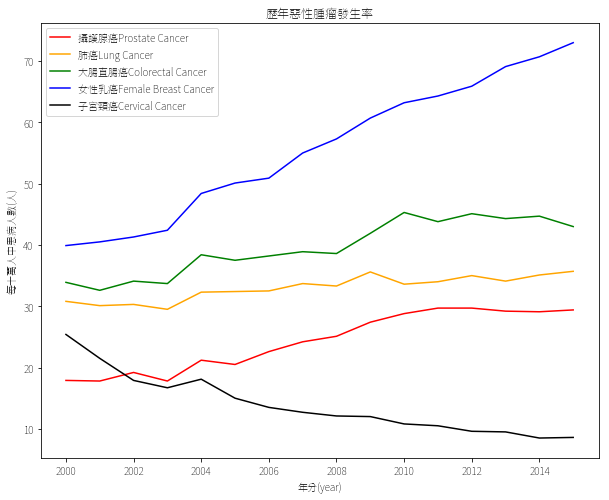

In [415]:
plt.figure(figsize=(10, 8))
plt.plot(Year, Prostate, label = "攝護腺癌Prostate Cancer", color = "red")
plt.plot(Year, Lung, label = "肺癌Lung Cancer", color = "orange")
plt.plot(Year, Colorectal, label = "大腸直腸癌Colorectal Cancer", color = "green")
plt.plot(Year, Breast, label = "女性乳癌Female Breast Cancer", color = "blue")
plt.plot(Year, Cervical, label = "子宮頸癌Cervical Cancer", color = "black")

plt.legend(loc = "upper left")
plt.xlabel("年分(year)")
plt.ylabel("每十萬人中患病人數(人)")
plt.title("歷年惡性腫瘤發生率")

# 各疾病與前一年比較的成長率

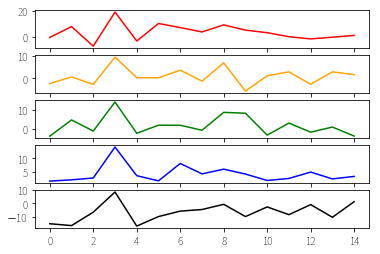

In [416]:
# 計算各疾病與前一年的成長率
RateProstate = ((Prostate[1:]-Prostate[0:-1])/Prostate[0:-1])*100
RateLung = ((Lung[1:]-Lung[0:-1])/Lung[0:-1])*100
RateColorectal = ((Colorectal[1:]-Colorectal[0:-1])/Colorectal[0:-1])*100
RateBreast = ((Breast[1:]-Breast[0:-1])/Breast[0:-1])*100
RateCervical = ((Cervical[1:]-Cervical[0:-1])/Cervical[0:-1])*100

fig, ax = plt.subplots(5, 1)

ax[0].plot(RateProstate, color = "red")
ax[1].plot(RateLung, color = "orange")
ax[2].plot(RateColorectal, color = "green")
ax[3].plot(RateBreast, color = "blue")
ax[4].plot(RateCervical, color = "black")


# 問題:
# 假設五種發生機率與種族性別皆無關(且若是患有一種即不會患有其他種腫瘤)，則在西元2015年全球患得腫瘤人數(設全球70億人口)

In [421]:
A = TotalDataY.loc[15, :].values
A = A[1:]
A = np.around(A)
A = A.astype(int)
Dic = ["攝護腺癌"]*A[0]+["肺癌"]*A[1]+["大腸直腸癌"]*A[2]+["女性乳癌"]*A[3]+["子宮頸癌"]*A[4]+["正常"]*(100000-sum(A))

In [425]:
X = np.zeros((6, 1))
for i in range(0, 23000000, 1):
    Take = np.random.randint(len(Dic))
    Take = Dic[Take]
    if Take == "攝護腺癌":
        X[0, 0] = X[0, 0]+1
    elif Take == "肺癌":
        X[1, 0] = X[1, 0]+1
    elif Take == "大腸直腸癌":
        X[2, 0] = X[2, 0]+1
    elif Take == "女性乳癌":
        X[3, 0] = X[3, 0]+1
    elif Take == "子宮頸癌":
        X[4, 0] = X[4, 0]+1
    else:
        X[5, 0] = X[5, 0]+1

In [426]:
Name = ["攝護腺癌", "肺癌", "大腸直腸癌", "女性乳癌", "子宮頸癌", "正常"]
X = X.ravel()
X = np.around(X)
X = X.astype(int)
print(f"患得攝護腺癌的人數為{X[0]}人")
print(" ")
print(f"患得肺癌的人數為{X[1]}人")
print(" ")
print(f"患得大腸直腸癌的人數為{X[2]}人")
print(" ")
print(f"患得女性乳癌的人數為{X[3]}人")
print(" ")
print(f"患得子宮頸癌的人數為{X[4]}人")
print(" ")
print(f"身體健康的人數為{X[5]}人")

患得攝護腺癌的人數為6682人
 
患得肺癌的人數為8280人
 
患得大腸直腸癌的人數為9797人
 
患得女性乳癌的人數為16672人
 
患得子宮頸癌的人數為2032人
 
身體健康的人數為22956537人
